In [1]:
%matplotlib inline

import time
import sys
sys.path.append("..")

from any_angle.anya.api import Anya
from any_angle._2k_astar.api import (create_canonical_algo_with_euclidean_heuristics,
                                     create_2k_astar_algo_with_euclidean_heuristics,
                                     create_canonical_algo_with_h_2k_heuristics,
                                     create_2k_astar_algo_with_h_2k_heuristics)
from any_angle.theta.api import (ThetaAPWithEuclideanHeuristics,
                                 ThetaAPWithWeightedHeuristics,
                                 LazyThetaWithEuclideanHeuristics,
                                 LazyThetaWithWeightedHeuristics)
from any_angle.common.draw import draw_static_if_path_found
from any_angle.full_graph.api import FullGraph

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

// just to show all output without scrolling (this cell may be skipped)

<IPython.core.display.Javascript object>

In [3]:
height = 15
width = 30
map_str = '''
.....................@@.......
.....................@@.......
.....................@@.......
.....................@@.......
.............@@......@@.......
...@@........@@......@@@@@....
...@@........@@......@@@@@....
...@@........@@......@@.......
...@@........@@......@@.@@@@@@
...@@........@@......@@.@@@@@@
...@@........@@......@@.@@@@@@
...@@........@@...............
.............@@...............
.............@@...............
..............................
'''

start = (1, 1)
goal = (1, 25)

optimal_name = "Brute-force"
algorithms = {
    optimal_name: FullGraph(),
    "Anya (optimal algorithm)": Anya(),
    "2^k A*, euclidean heuristics, k=3": create_2k_astar_algo_with_euclidean_heuristics(3),
    "2^k A*, euclidean heuristics, k=7": create_2k_astar_algo_with_euclidean_heuristics(7),
    "Canonical 2^k A*, euclidean heuristics, k=3": create_canonical_algo_with_euclidean_heuristics(3),
    "Canonical 2^k A*, euclidean heuristics, k=7": create_canonical_algo_with_euclidean_heuristics(7),
    "2^k A*, h_2k heuristics, k=3": create_2k_astar_algo_with_h_2k_heuristics(3),
    "2^k A*, h_2k heuristics, k=7": create_2k_astar_algo_with_h_2k_heuristics(7),
    "Canonical 2^k A*, h_2k heuristics, k=3": create_canonical_algo_with_h_2k_heuristics(3),
    "Canonical 2^k A*, h_2k heuristics, k=7": create_canonical_algo_with_h_2k_heuristics(7),
    "Theta AP, euclidean heuristics": ThetaAPWithEuclideanHeuristics(),
    "Theta AP, weighted heuristics": ThetaAPWithWeightedHeuristics(),
    "Lazy Theta, euclidean heuristics": LazyThetaWithEuclideanHeuristics(),
    "Lazy Theta, weighted heuristics": LazyThetaWithWeightedHeuristics(),
}


------
Brute-force
------
Time: 1.5448131561279297
Found path length: 37.05881678385507
Suboptimality: 0.000%


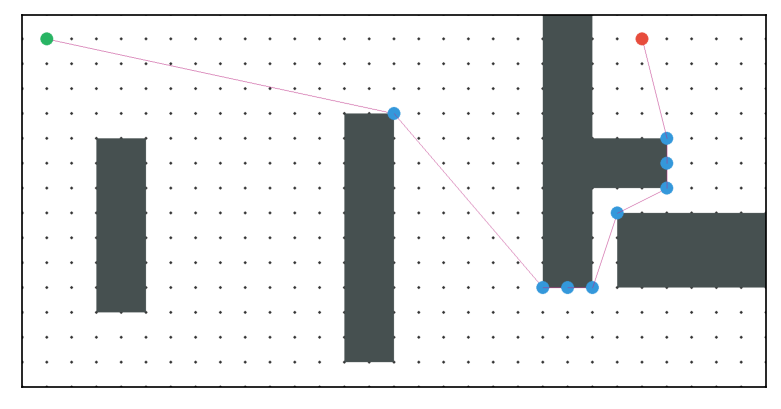


------
Anya (optimal algorithm)
------
Time: 0.013671398162841797
Found path length: 37.05881678385507
Suboptimality: 0.000%


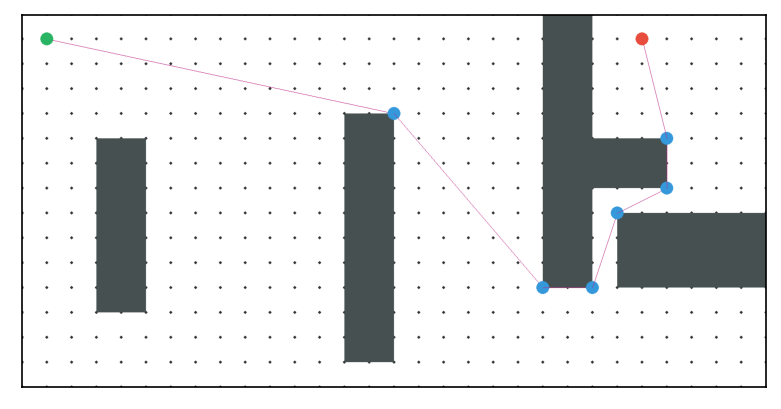


------
2^k A*, euclidean heuristics, k=3
------
Time: 0.040842533111572266
Found path length: 38.97056274847714
Suboptimality: 5.159%


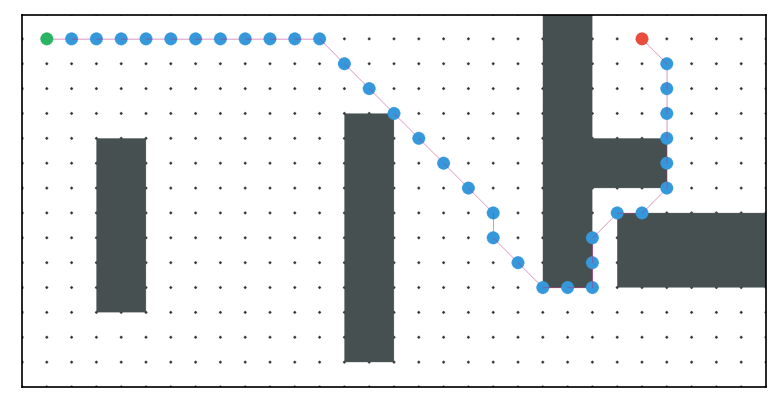


------
2^k A*, euclidean heuristics, k=7
------
Time: 0.3974418640136719
Found path length: 37.07414727826809
Suboptimality: 0.041%


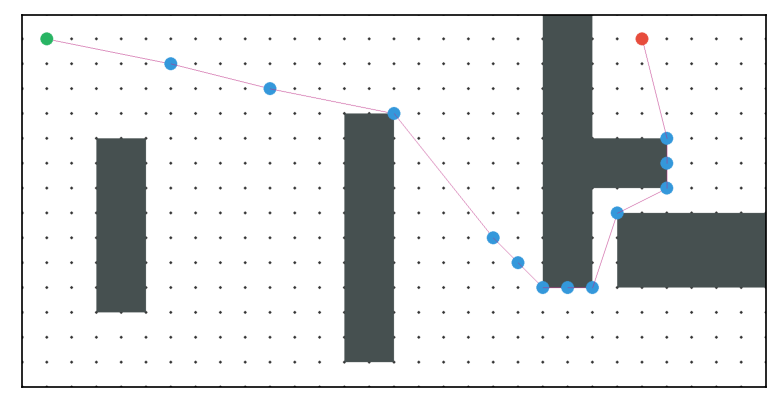


------
Canonical 2^k A*, euclidean heuristics, k=3
------
Time: 0.01023101806640625
Found path length: 38.97056274847714
Suboptimality: 5.159%


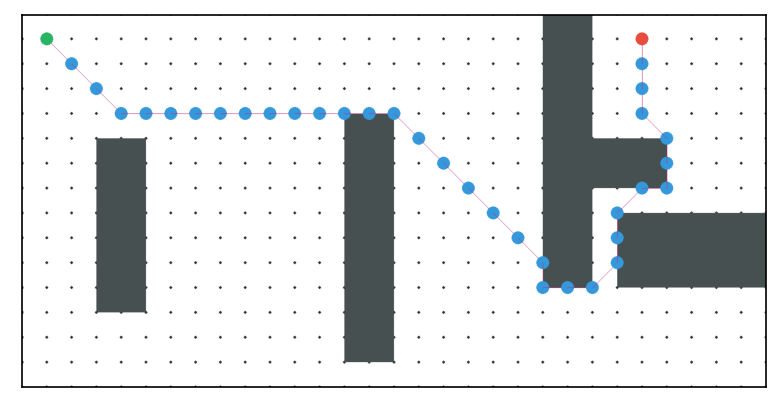


------
Canonical 2^k A*, euclidean heuristics, k=7
------
Time: 0.0208892822265625
Found path length: 37.0741472782681
Suboptimality: 0.041%


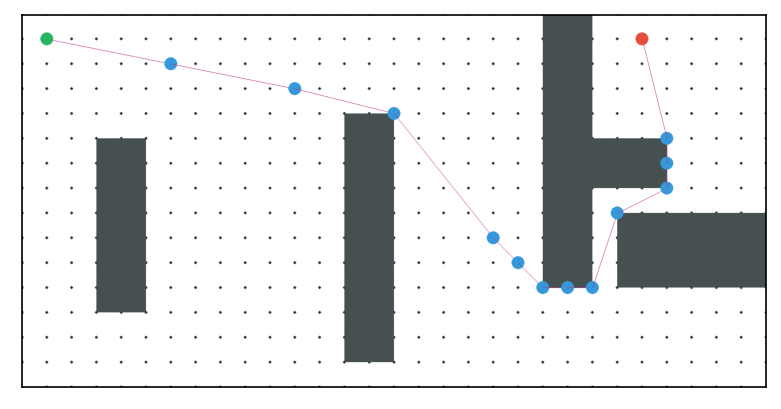


------
2^k A*, h_2k heuristics, k=3
------
Time: 0.04413437843322754
Found path length: 38.97056274847714
Suboptimality: 5.159%


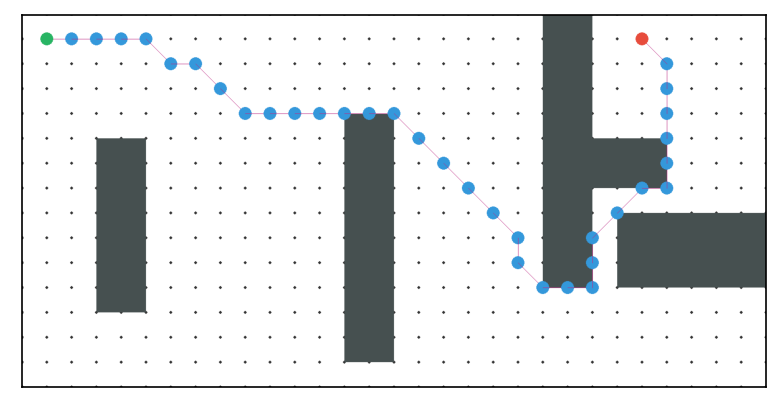


------
2^k A*, h_2k heuristics, k=7
------
Time: 0.42577219009399414
Found path length: 37.07414727826809
Suboptimality: 0.041%


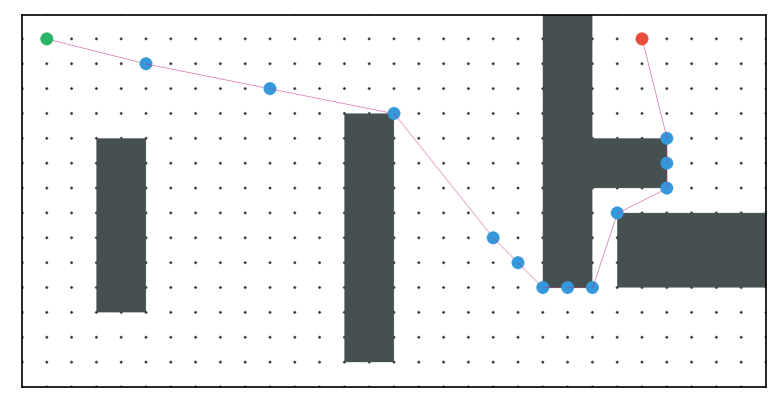


------
Canonical 2^k A*, h_2k heuristics, k=3
------
Time: 0.011771440505981445
Found path length: 38.97056274847714
Suboptimality: 5.159%


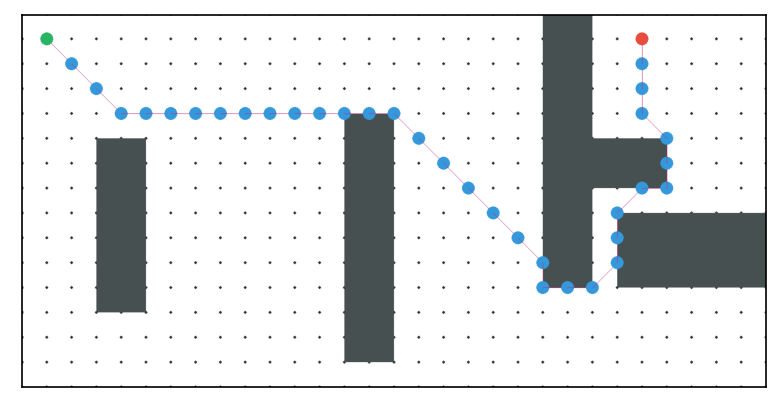


------
Canonical 2^k A*, h_2k heuristics, k=7
------
Time: 0.017545700073242188
Found path length: 37.0741472782681
Suboptimality: 0.041%


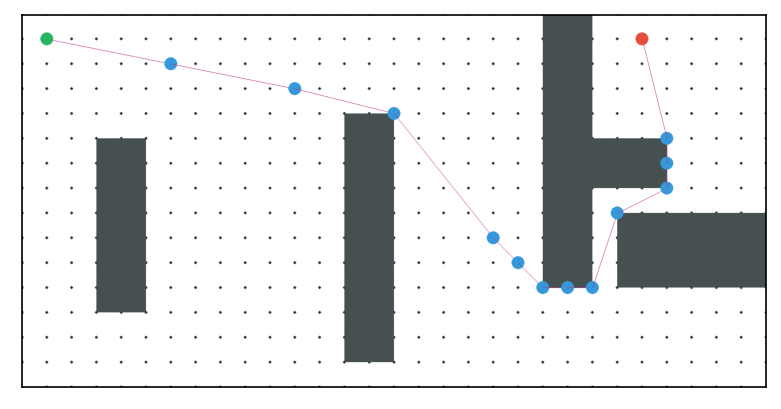


------
Theta AP, euclidean heuristics
------
Time: 0.04960012435913086
Found path length: 37.18293185399439
Suboptimality: 0.335%


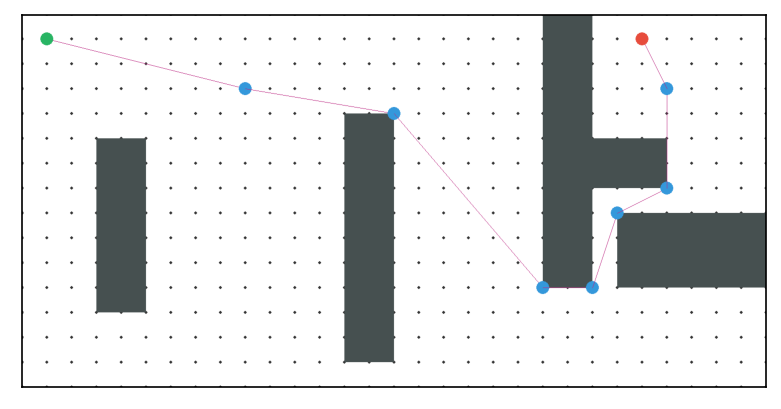


------
Theta AP, weighted heuristics
------
Time: 0.058679819107055664
Found path length: 37.05881678385507
Suboptimality: 0.000%


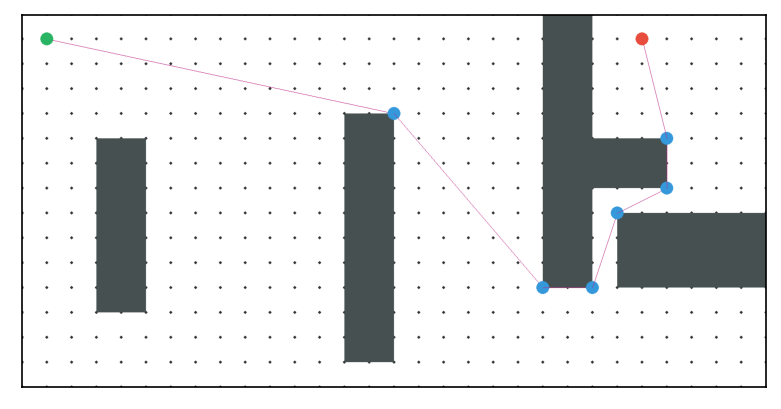


------
Lazy Theta, euclidean heuristics
------
Time: 0.046244144439697266
Found path length: 37.1717791357372
Suboptimality: 0.305%


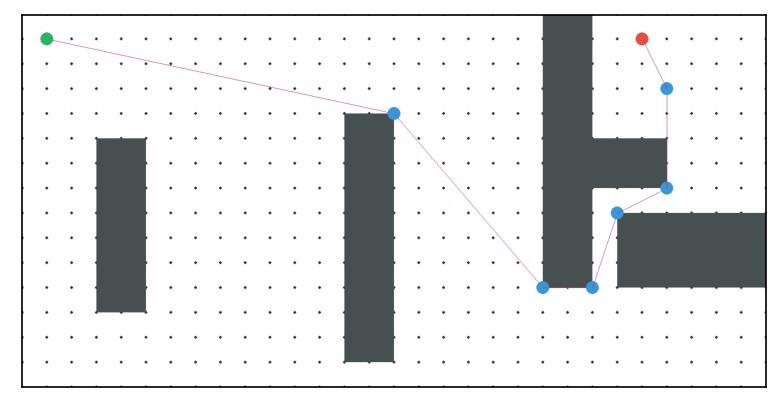


------
Lazy Theta, weighted heuristics
------
Time: 0.05878806114196777
Found path length: 37.05881678385507
Suboptimality: 0.000%


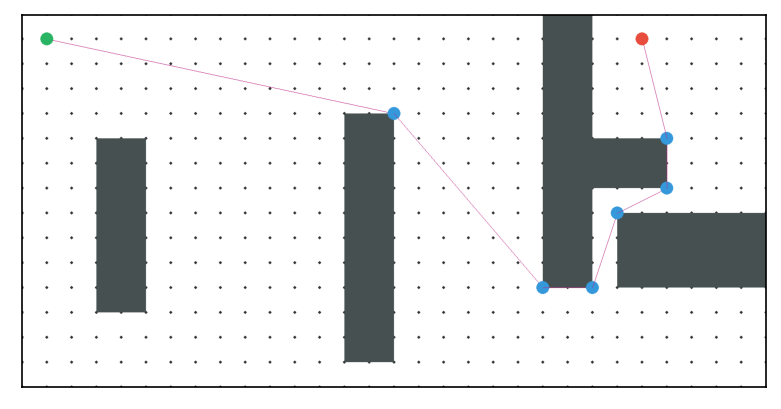

In [4]:
optimal = None
for algo in algorithms:
    map_ = algorithms[algo].read_map(map_str, width, height)
    start_time = time.time()
    stats = algorithms[algo].compute_path_from_map(map_, start, goal)
    print(f"\n------\n{algo}\n------")
    print(f"Time: {time.time() - start_time}")
    if stats.path_found:
        print(f"Found path length: {stats.way_length}")
    if algo == optimal_name and stats.path_found:
        optimal = stats.way_length
    if stats.path_found and optimal:
        print("Suboptimality: %.3f" % (stats.way_length / optimal * 100 - 100) + "%")
    draw_static_if_path_found(map_, start, goal, stats)
    